In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
%matplotlib inline

In [ ]:
#文本模型测试tensorflow Hub
model = hub.KerasLayer("https://hub.tensorflow.google.cn/google/nnlm-en-dim128/2")
result = model(["Hello","World"])
print(result.shape)

In [14]:
path_to_labels = 'object_detection/data/mscoco_label_map.pbtxt'   #加载标签对应文件
category_index = label_map_util.create_category_index_from_labelmap(path_to_labels, use_display_name=True)   #创建标签映射

In [15]:
#可调用的Faster RCNN模型列表
all_models = {
'CenterNet HourGlass104 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://hub.tensorflow.google.cn/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://hub.tensorflow.google.cn/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://hub.tensorflow.google.cn/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://hub.tensorflow.google.cn/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://hub.tensorflow.google.cn/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

In [16]:
model_name = 'Faster R-CNN ResNet50 V1 640x640' 
model_handle = all_models[model_name]   #加载指定模型

In [17]:
FasterRcnn_model = hub.load(model_handle)

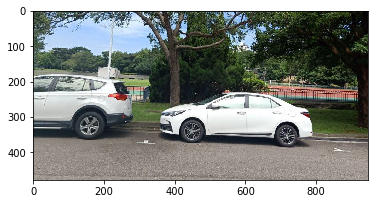

In [18]:
image = Image.open("car.jpg")
plt.imshow(image)
plt.show()

In [19]:
(im_width, im_height) = image.size
#转换numpy形式
image = np.array(image.getdata()).reshape((1, im_height, im_width, 3)).astype(np.uint8)

In [20]:
results = FasterRcnn_model(image)
result = {key:value.numpy() for key,value in results.items()}   #查看检测结果里包含的内容
print(result.keys())

dict_keys(['detection_anchor_indices', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'detection_classes', 'raw_detection_scores', 'detection_boxes', 'detection_multiclass_scores'])


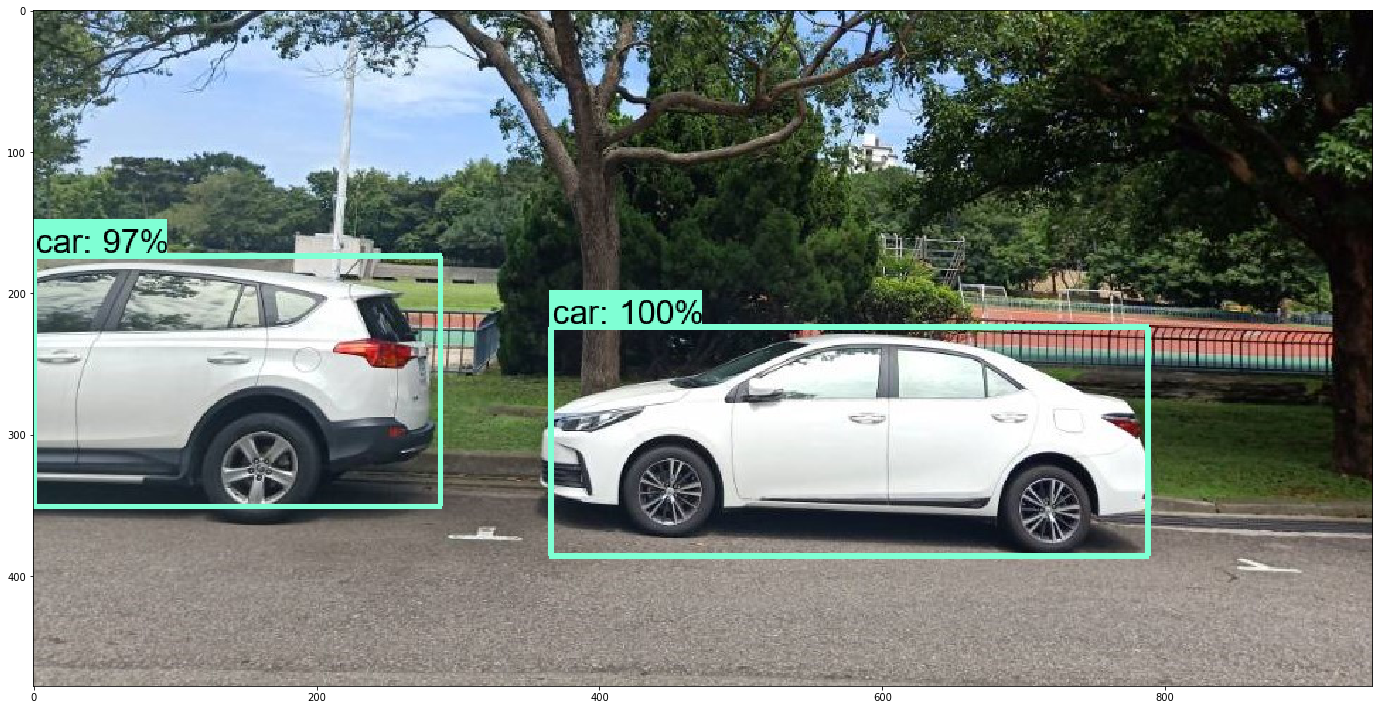

In [21]:
label_id_offset = 0
image_np_with_detections = image.copy()

keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:   #判断在结果中是否有检测到物体
    keypoints = result['detection_keypoints'][0]
    keypoint_scores = result['detection_keypoint_scores'][0]
#结果预测框和分数可视化函数
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()